In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


pd.set_option('display.max_rows', None)

In [ ]:
pip install catboost

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.svm import SVR

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

from sklearn.tree import ExtraTreeRegressor,DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/project/Course Advisory Project Data - results_gpa (1).csv")

In [ ]:
data.head()

RegNo_ ID  Session_Cp  Semester_Cp  SemGPA_Cp  CumGPA_Cp
0          1        2010            1       2.47       2.20
1          2        2010            1       1.43       1.83
2          3        2010            1       3.35       3.23
3          4        2010            1       3.43       2.45
4          5        2010            1       3.05       2.91

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RegNo_ ID    12140 non-null  int64  
 1   Session_Cp   12140 non-null  int64  
 2   Semester_Cp  12140 non-null  int64  
 3   SemGPA_Cp    12096 non-null  float64
 4   CumGPA_Cp    12096 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 474.3 KB


## To drop rows whose GPA and CGPA == 0

In [ ]:
data_zero = data[(data["SemGPA_Cp"]== 0) & (data["CumGPA_Cp"]== 0)].index

data = data.drop(data_zero)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11381 entries, 0 to 12139
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RegNo_ ID    11381 non-null  int64  
 1   Session_Cp   11381 non-null  int64  
 2   Semester_Cp  11381 non-null  int64  
 3   SemGPA_Cp    11337 non-null  float64
 4   CumGPA_Cp    11337 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 533.5 KB


### Dealing with the missing values

In [ ]:
data.isnull().sum()

RegNo_ ID       0
Session_Cp      0
Semester_Cp     0
SemGPA_Cp      44
CumGPA_Cp      44
dtype: int64

In [ ]:
# sorting the values by registration no and then by session inorder to fill the missing values using forward fill 
# so as to have a tailored filling

df_sort = data.sort_values(by= ["RegNo_ ID", "Session_Cp"])

#  filling the missing values by forward fill method
df_sort = df_sort.fillna(method = "ffill")
df_sort.isnull().sum()

RegNo_ ID      0
Session_Cp     0
Semester_Cp    0
SemGPA_Cp      0
CumGPA_Cp      0
dtype: int64

In [ ]:
data = df_sort.copy()
data.head(10)

RegNo_ ID  Session_Cp  Semester_Cp  SemGPA_Cp  CumGPA_Cp
0             1        2010            1       2.47       2.20
877           1        2010            2       3.00       2.43
1470          1        2011            1       3.63       2.64
1963          1        2011            2       3.24       2.75
2310          1        2012            1       3.95       2.92
2815          1        2012            2       4.80       3.12
3278          1        2013            1       4.72       3.29
3856          1        2013            2       4.70       3.44
1             2        2010            1       1.43       1.83
684           2        2010            2       1.55       1.75

In [ ]:
# to check the min and max Sem GPA and CGPA in the dataset

min_GPA = np.min(data["SemGPA_Cp"])
max_GPA = np.max(data["SemGPA_Cp"])
min_CGPA = np.min(data["CumGPA_Cp"])
max_CGPA = np.max(data["CumGPA_Cp"])

print("Minimum Semester GPA:", min_GPA,
     "\nMaximun Semester GPA:", max_GPA,
      "\n"
     "\nMinimum Cummulative GPA:", min_CGPA,
     "\nMaximun Cummulative GPA:", max_CGPA)



Minimum Semester GPA: 0.0 
Maximun Semester GPA: 5.0 

Minimum Cummulative GPA: 0.06 
Maximun Cummulative GPA: 5.0


### Histogram to show the distributions of semester GPA and the Cum GPA

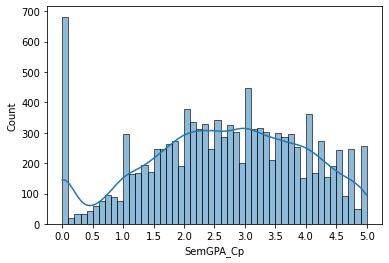

In [ ]:
# Histogram to show the distributions of semester GPA 

plt.xticks(np.arange(0, 6, step=0.5)) 
sns.histplot(data["SemGPA_Cp"], bins = 50, kde = True)

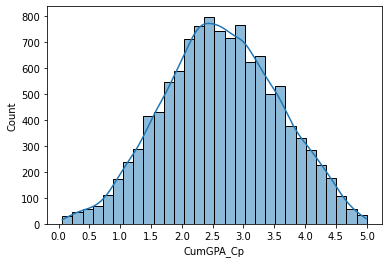

In [ ]:
# Histogram to show the distributions of the Cum GPA

plt.xticks(np.arange(0, 6, step=0.5)) 
sns.histplot(data["CumGPA_Cp"], bins = 30, kde = True)

This plot forms a symetric plot, with more CumGPA concentrating in the middle, also implies that the mean of the CumGPA result is approximately equal to its median

# Grouping by RegNo_Id

In [ ]:
#  to check the columns of the data set
data.columns

Index(['RegNo_ ID', 'Session_Cp', 'Semester_Cp', 'SemGPA_Cp', 'CumGPA_Cp'], dtype='object')

In [ ]:
df = data.groupby(['RegNo_ ID','Session_Cp', 'Semester_Cp'])
df.first()

SemGPA_Cp  CumGPA_Cp
RegNo_ ID Session_Cp Semester_Cp                      
1         2010       1                 2.47       2.20
                     2                 3.00       2.43
          2011       1                 3.63       2.64
                     2                 3.24       2.75
          2012       1                 3.95       2.92
                     2                 4.80       3.12
          2013       1                 4.72       3.29
                     2                 4.70       3.44
2         2010       1                 1.43       1.83
                     2                 1.55       1.75
          2011       1                 1.33       1.65
                     2                 2.26       1.76
          2012       1                 2.78       1.92
                     2                 4.80       2.18
          2013       1                 1.96       2.15
                     2                 1.83       2.12
          2014       1                 1.17       2.07
                     2                 1.00       2.05
          2015       1                 1.50       2.03
                     2                 2.00       2.03
3         2010       1                 3.35       3.23
                     2                 3.19       3.22
          2011       1                 3.50       3.28
                     2                 4.00       3.40
          2012       1                 4.11       3.50
                     2                 4.40       3.58
          2013       1                 3.50       3.57
                     2                 4.40       3.66
4         2010       1                 3.43       2.45
                     2                 2.14       2.37
          2011       1                 1.73       2.23
                     2                 2.14       2.21
          2012       1                 3.30       2.39
                     2                 4.20       2.56
          2013       1                 2.91       2.60
                     2                 2.17       2.55
          2014       1                 1.00       2.53
                     2                 3.71       2.57
5         2010       1                 3.05       2.91
                     2                 2.38       2.77
          2011       1                 2.77       2.77
                     2                 3.41       2.89
          2012       1                 3.11       2.91
                     2                 4.80       3.10
          2013       1                 3.77       3.18
                     2                 3.60       3.22
6         2010       1                 1.00       2.02
                     2                 0.43       1.59
          2011       1                 1.33       1.55
                     2                 1.78       1.56
          2012       1                 1.05       1.47
                     2                 3.20       1.65
          2013       1                 1.20       1.59
                     2                 1.05       1.54
          2014       1                 1.29       1.51
                     2                 0.96       1.46
          2015       1                 1.44       1.46
                     2                 2.00       1.48
          2016       1                 0.00       1.48
                     2                 0.00       1.48
          2017       1                 3.00       1.49
7         2010       1                 3.30       3.12
                     2                 2.24       2.88
          2011       1                 2.45       2.79
                     2                 2.71       2.78
          2012       1                 1.89       2.66
                     2                 4.40       2.83
          2013       1                 2.20       2.75
                     2                 3.09       2.79
          2014       1                 0.88       2.72
                     2                 0.00       2.53
          2015     

In [ ]:
# a function to get a particular individual result

def person_session(regno, session):
    b = data[(data["RegNo_ ID"] == regno) & (data["Session_Cp"] == session)]
    df_person = pd.DataFrame({'SemGPA_Cp': b["SemGPA_Cp"], 'CumGPA_Cp': b["CumGPA_Cp"]}).set_index(b['Semester_Cp'])
    
    print("For the individual with RegNo_Id", regno, "\nWith Session", session, ",\nWe have the following results")
    return df_person


person_session(2110, 2018)

For the individual with RegNo_Id 2110 
With Session 2018 ,
We have the following results


SemGPA_Cp  CumGPA_Cp
Semester_Cp                      
1                 3.39       3.39
2                 3.00       3.19

Table and a Chart showing the result of student with ID 1


Semester_Cp  SemGPA_Cp  CumGPA_Cp
Session_Cp                                   
2010                  1       2.47       2.20
2010                  2       3.00       2.43
2011                  1       3.63       2.64
2011                  2       3.24       2.75
2012                  1       3.95       2.92
2012                  2       4.80       3.12
2013                  1       4.72       3.29
2013                  2       4.70       3.44

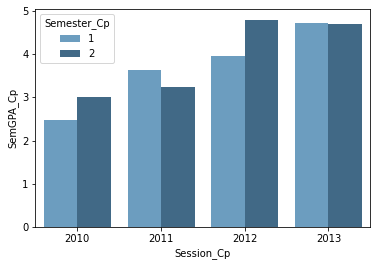

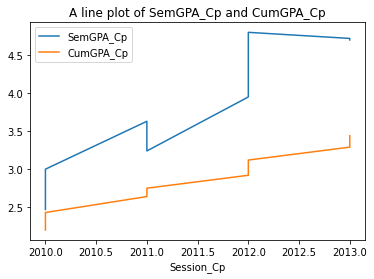

In [ ]:
# A function to accept a persons regno_Id and the desired GP to show(either the "SemGPA_Cp" or "CumGPA_Cp")
# to produce the record of the student, as well as a relating plot 

def person_plot(regno, GP):
    b = data[(data["RegNo_ ID"] == regno)]
    
    sns.barplot(x = "Session_Cp", y = GP, hue = "Semester_Cp", data = b, palette = "Blues_d")
    

    b = b.drop(["RegNo_ ID","Session_Cp"], 1).set_index(b['Session_Cp'])
    
    
    b.drop(["Semester_Cp"],1).plot()
    plt.title("A line plot of SemGPA_Cp and CumGPA_Cp")
    
    print("Table and a Chart showing the result of student with ID", regno)
    return b



person_plot(1, "SemGPA_Cp")

..................................................

# Grouping by session

In [ ]:
df1 = data.groupby(['Session_Cp', "RegNo_ ID", "Semester_Cp"])
df1.first()

SemGPA_Cp  CumGPA_Cp
Session_Cp RegNo_ ID Semester_Cp                      
2010       1         1                 2.47       2.20
                     2                 3.00       2.43
           2         1                 1.43       1.83
                     2                 1.55       1.75
           3         1                 3.35       3.23
                     2                 3.19       3.22
           4         1                 3.43       2.45
                     2                 2.14       2.37
           5         1                 3.05       2.91
                     2                 2.38       2.77
           6         1                 1.00       2.02
                     2                 0.43       1.59
           7         1                 3.30       3.12
                     2                 2.24       2.88
           8         1                 1.55       1.79
                     2                 2.05       1.86
           9         1                 2.28       1.91
                     2                 2.29       1.99
           10        1                 2.05       2.46
                     2                 2.29       2.38
           11        1                 1.55       1.70
                     2                 1.61       1.68
           12        1                 3.35       3.02
                     2                 2.86       2.97
           13        1                 2.80       3.25
                     2                 2.90       3.15
           14        1                 2.55       2.77
                     2                 1.76       2.50
           15        1                 2.70       2.93
                     2                 2.57       2.83
           16        1                 2.30       2.70
                     2                 2.33       2.60
           17        1                 2.45       2.70
                     2                 2.52       2.65
           18        1                 4.25       3.95
                     2                 3.57       3.85
           19        1                 2.10       2.58
                     2                 2.33       2.51
           20        1                 2.90       2.98
                     2                 3.05       3.00
           21        1                 2.45       2.44
                     2                 1.96       2.30
           22        1                 0.70       1.88
                     2                 0.33       1.46
           23        1                 4.05       3.67
                     2                 4.00       3.76
           24        1                 1.13       1.57
                     2                 1.05       1.44
           25        1                 2.75       2.88
                     2                 2.43       2.76
           26        1                 1.85       2.51
                     2                 1.86       2.33
           27        1                 2.20       2.77
                     2                 1.90       2.53
           28        1                 3.38       3.91
                     2                 3.10       3.69
           29        1                 4.30       4.37
                     2                 3.81       4.22
           30        1                 3.90       3.70
                     2                 3.76       3.72
           31        1                 2.35       2.30
                     2                 2.43       2.33
           32        1                 3.10       3.70
                     2                 3.48       3.64
           33        1                 3.35       3.77
                     2                 2.48       3.42
           34        1                 2.10       2.58
                     2                 1.67       2.31
           35        1                 1.40       2.19
                     2                 1.33       1.96
           36        1                 2.55       2.58
                   

### To check the distribution of CGPA or GPA in a particular session and semester

In [ ]:
# to check the various sessions in the dataset
data["Session_Cp"].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

For Session 2011 and Semester 1 
Least CGPA is: 0.09 
Highest CGPA is: 4.89


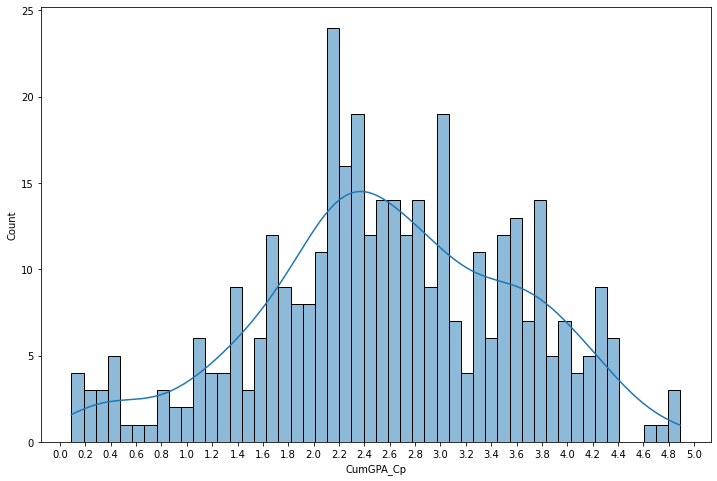

In [ ]:
#  A function to return the least and highest CGPA of a particular session and semester and checks the distribution of the CGPA
# note that sessions(ses) only include from 2010 to 2018 
# and semesters(sem) include just 1 and 2

def by_session_semester(ses, sem):
    df_by_session = data[(data["Session_Cp"] == ses) & (data["Semester_Cp"] == sem)]
    
    fig, ax = plt.subplots(figsize = (12,8))
    plt.xticks(np.arange(0, 6, step=0.2)) 
    sns.histplot(df_by_session["CumGPA_Cp"], bins = 50, kde = True)
    
    mini = np.min(df_by_session["CumGPA_Cp"])
    maxi = np.max(df_by_session["CumGPA_Cp"])
    
    print("For Session", ses, "and Semester", sem,
        "\nLeast CGPA is:",mini,
         "\nHighest CGPA is:",maxi)
    
    
    
by_session_semester(2011, 1)

### To return the latest Sem_GPA and Cum_GPA for each students

In [ ]:
reg = data["RegNo_ ID"].unique()
reg

array([   1,    2,    3, ..., 2109, 2110, 2112])

In [ ]:
a = []
b = []
c = []

for i in reg:
    regno = data[data["RegNo_ ID"] == i]
    a.append(regno["Session_Cp"].tolist()[-1])
    b.append(regno["SemGPA_Cp"].tolist()[-1])
    c.append(regno["CumGPA_Cp"].tolist()[-1])
    
Latest_result = pd.DataFrame({"RegNo_ ID": reg, "Session_Cp": a, "SemGPA_Cp": b, "CumGPA_Cp": c})
Latest_result.head()

RegNo_ ID  Session_Cp  SemGPA_Cp  CumGPA_Cp
0          1        2013       4.70       3.44
1          2        2015       2.00       2.03
2          3        2013       4.40       3.66
3          4        2014       3.71       2.57
4          5        2013       3.60       3.22

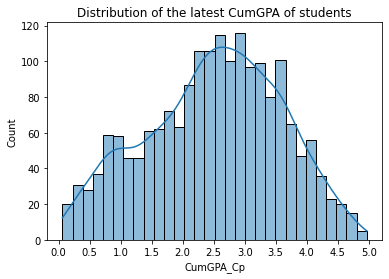

In [ ]:
plt.xticks(np.arange(0, 6, step=0.5)) 
plt.title("Distribution of the latest CumGPA of students")
sns.histplot(Latest_result["CumGPA_Cp"],  bins = 30, kde = True)

### Mapping results of each students as columns to their ID inorder to create a valid model

In [ ]:
data.head(50)

RegNo_ ID  Session_Cp  Semester_Cp  SemGPA_Cp  CumGPA_Cp
0             1        2010            1       2.47       2.20
877           1        2010            2       3.00       2.43
1470          1        2011            1       3.63       2.64
1963          1        2011            2       3.24       2.75
2310          1        2012            1       3.95       2.92
2815          1        2012            2       4.80       3.12
3278          1        2013            1       4.72       3.29
3856          1        2013            2       4.70       3.44
1             2        2010            1       1.43       1.83
684           2        2010            2       1.55       1.75
1412          2        2011            1       1.33       1.65
1866          2        2011            2       2.26       1.76
2222          2        2012            1       2.78       1.92
2756          2        2012            2       4.80       2.18
3220          2        2013            1       1.96       2.15
3750          2        2013            2       1.83       2.12
4678          2        2014            1       1.17       2.07
5437          2        2014            2       1.00       2.05
6034          2        2015            1       1.50       2.03
6916          2        2015            2       2.00       2.03
2             3        2010            1       3.35       3.23
707           3        2010            2       3.19       3.22
1395          3        2011            1       3.50       3.28
1891          3        2011            2       4.00       3.40
2242          3        2012            1       4.11       3.50
2745          3        2012            2       4.40       3.58
3177          3        2013            1       3.50       3.57
3708          3        2013            2       4.40       3.66
3             4        2010            1       3.43       2.45
672           4        2010            2       2.14       2.37
1407          4        2011            1       1.73       2.23
1863          4        2011            2       2.14       2.21
2214          4        2012            1       3.30       2.39
2731          4        2012            2       4.20       2.56
3209          4        2013            1       2.91       2.60
3742          4        2013            2       2.17       2.55
4670          4        2014            1       1.00       2.53
5425          4        2014            2       3.71       2.57
4             5        2010            1       3.05       2.91
690           5        2010            2       2.38       2.77
1381          5        2011            1       2.77       2.77
1880          5        2011            2       3.41       2.89
2234          5        2012            1       3.11       2.91
2714          5        2012            2       4.80       3.10
3187          5        2013            1       3.77       3.18
3717          5        2013            2       3.60       3.22
5             6        2010            1       1.00       2.02
704           6        2010            2       0.43       1.59
1363          6        2011            1       1.33       1.55
1852          6        2011            2       1.78       1.56

In [ ]:
#  seperating  students with more than 5 semesters from those with less

valid_reg = []
non_valid_reg = []
for i in reg:
    regnu = data[data["RegNo_ ID"] == i]
    session_len = len(regnu["Session_Cp"].tolist())
    if session_len >= 7:
        valid_reg.append(i)
    else:
        non_valid_reg.append(i)
        

In [ ]:
print(len(non_valid_reg))
print(len(valid_reg))

1020
837


In [ ]:
# mapping results of each students as columns to their ID inorder to create a valid model

col1 = []
col2 = []
col3 = [] 
col4 = []
col5 = []
col6 = []
target_col = []

for i in valid_reg:
    a = data[data["RegNo_ ID"] == i]
    b = a["CumGPA_Cp"].tolist()
    c = a["SemGPA_Cp"].tolist()
    
    col1.append(b[0])
    col2.append(b[1])
    col3.append(b[2])
    col4.append(b[3])
    col5.append(b[4])
    col6.append(b[5])
    target_col.append(b[6])
    


In [ ]:
    
valid_df = pd.DataFrame({"Regno_ID": valid_reg, "Cum_GPA_1": col1, "Cum_GPA_2":col2, "Cum_GPA_3":col3, 
                         "Cum_GPA_4":col4, "Cum_GPA_5":col5, "Cum_GPA_6":col6, "Target_Cum_GPA": target_col,})

valid_df.head()

Regno_ID  Cum_GPA_1  Cum_GPA_2  ...  Cum_GPA_5  Cum_GPA_6  Target_Cum_GPA
0         1       2.20       2.43  ...       2.92       3.12            3.29
1         2       1.83       1.75  ...       1.92       2.18            2.15
2         3       3.23       3.22  ...       3.50       3.58            3.57
3         4       2.45       2.37  ...       2.39       2.56            2.60
4         5       2.91       2.77  ...       2.91       3.10            3.18

[5 rows x 8 columns]

In [ ]:
# when n = 2 (predicting part 2, Sem 1)
valid_df_cum_2 = valid_df[["Regno_ID", "Cum_GPA_1", "Cum_GPA_2","Cum_GPA_3",]]
valid_df_cum_2.rename({'Cum_GPA_3': 'Target_CGPA_3'}, axis=1, inplace=True)



# when n = 3 (predicting part 2, Sem 2)
valid_df_cum_3 = valid_df[["Regno_ID", "Cum_GPA_1", "Cum_GPA_2","Cum_GPA_3", "Cum_GPA_4"]]
valid_df_cum_3.rename({'Cum_GPA_4': 'Target_CGPA_4'}, axis=1, inplace=True)




# when n = 4 (predicting part 3, Sem 1)
valid_df_cum_4 = valid_df[["Regno_ID", "Cum_GPA_1", "Cum_GPA_2","Cum_GPA_3", "Cum_GPA_4",
                      "Cum_GPA_5"]]
valid_df_cum_4.rename({'Cum_GPA_5': 'Target_CGPA_5'}, axis=1, inplace=True)




# when n = 5 (predicting part 3, Sem 2)
valid_df_cum_5 = valid_df[["Regno_ID", "Cum_GPA_1", "Cum_GPA_2","Cum_GPA_3", "Cum_GPA_4",
                      "Cum_GPA_5", "Cum_GPA_6"]]
valid_df_cum_5.rename({'Cum_GPA_6': 'Target_CGPA_6'}, axis=1, inplace=True)




# when n = 6 (predicting part 4, Sem 1)
valid_df_cum_6 = valid_df[["Regno_ID", "Cum_GPA_1", "Cum_GPA_2","Cum_GPA_3", "Cum_GPA_4",
                      "Cum_GPA_5", "Cum_GPA_6", "Target_Cum_GPA"]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### To get the expected Sem_GPA

In [ ]:
# when n = 6 (getting part_4, Sem_1 Sem_GPA)

Ex_Sem_GPA = []
for i in range(0, len(valid_df_cum_6)):
    a = (2* (valid_df_cum_6.loc[i]["Target_Cum_GPA"])) - valid_df_cum_6.loc[i]["Cum_GPA_6"]
    Ex_Sem_GPA.append(a)
    
valid_df_cum_6["Ex_Sem_GPA_7"] = Ex_Sem_GPA

valid_df_cum_6.head()

Regno_ID  Cum_GPA_1  Cum_GPA_2  ...  Cum_GPA_6  Target_Cum_GPA  Ex_Sem_GPA_7
0         1       2.20       2.43  ...       3.12            3.29          3.46
1         2       1.83       1.75  ...       2.18            2.15          2.12
2         3       3.23       3.22  ...       3.58            3.57          3.56
3         4       2.45       2.37  ...       2.56            2.60          2.64
4         5       2.91       2.77  ...       3.10            3.18          3.26

[5 rows x 9 columns]

# Our Model

In [ ]:
# a function to define the metris we will be using

def metrics(pred, model):
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)

    print("Accuracy of test:",r2_score(y_test,pred))
    print("\nThe mean_absolute_error is {} \nThe mean_squared_error is {} \nThe root_mean_squared is {}".format(mae, mse, rmse))

### When n = 2

In [ ]:
X = valid_df_cum_2.drop(["Regno_ID", "Target_CGPA_3"], 1)
y = valid_df_cum_2["Target_CGPA_3"]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.40, random_state = 4)


svr2 = SVR(kernel = "linear", degree = 1)
svr2.fit(X_train, y_train)
svr2_pred = svr2.predict(X_test)


metrics(svr2_pred, svr2)

Accuracy of test: 0.9134117471822021

The mean_absolute_error is 0.1766777824377716 
The mean_squared_error is 0.05076883023237172 
The root_mean_squared is 0.2253193960412013


In [ ]:
import joblib
import pickle

svr2.fit(X,y)
joblib.dump(svr2, "CGPA2.pkl")
pickle.dump(svr2, open("CGPA22.sav", 'wb'))

### When n = 3

In [ ]:
X = valid_df_cum_3.drop(["Regno_ID", "Target_CGPA_4"], 1)
y = valid_df_cum_3["Target_CGPA_4"]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.40, random_state = 4)
print(X_train)

svr3 = SVR(kernel = "linear", degree = 1)
svr3.fit(X_train, y_train)
svr3_pred = svr3.predict(X_test)


metrics(svr3_pred, svr3)

     Cum_GPA_1  Cum_GPA_2  Cum_GPA_3
257       3.39       3.81       3.93
14        2.93       2.83       2.71
333       2.94       2.89       2.70
229       2.89       2.38       2.63
359       3.00       3.00       3.19
495       3.52       3.55       3.75
829       3.39       3.30       2.98
357       3.28       2.89       3.06
753       2.50       2.19       2.32
669       2.50       2.06       2.20
778       2.57       2.24       1.88
99        2.44       2.41       2.37
555       4.06       3.59       3.61
782       1.81       1.45       1.41
673       2.11       2.06       1.85
571       2.44       1.66       1.60
316       3.06       3.30       3.28
674       2.00       1.89       1.93
271       0.50       1.05       1.05
57        3.93       3.81       3.78
795       2.83       3.00       3.15
577       2.83       2.38       2.42
144       2.39       2.56       2.49
705       4.39       4.70       4.60
665       1.61       1.64       2.12
158       3.28       2.51       2.19
1

In [ ]:
svr3.fit(X,y)
joblib.dump(svr3, "CGPA3.pkl")
pickle.dump(svr3, open("CGPA333.sav", 'wb'))

### When n = 4

In [ ]:
X = valid_df_cum_4.drop(["Regno_ID", "Target_CGPA_5"], 1)
y = valid_df_cum_4["Target_CGPA_5"]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.40, random_state = 4)


svr4 = SVR(kernel = "linear", degree = 1)
svr4.fit(X_train, y_train)
svr4_pred = svr4.predict(X_test)


metrics(svr4_pred, svr4)

Accuracy of test: 0.9691898812172205

The mean_absolute_error is 0.10580570262993463 
The mean_squared_error is 0.018410440327910442 
The root_mean_squared is 0.13568507776432323


In [ ]:
svr4.fit(X,y)
joblib.dump(svr4, "CGPA4.pkl")
pickle.dump(svr4, open("CGPA44.sav", 'wb'))

### When n = 5

In [ ]:
X = valid_df_cum_5.drop(["Regno_ID", "Target_CGPA_6"], 1)
y = valid_df_cum_5["Target_CGPA_6"]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.40, random_state = 4)


svr5 = SVR(kernel = "linear", degree = 1)
svr5.fit(X_train, y_train)
svr5_pred = svr5.predict(X_test)


metrics(svr5_pred, svr5)

Accuracy of test: 0.9645876158067695

The mean_absolute_error is 0.11358335450377516 
The mean_squared_error is 0.020408205131642182 
The root_mean_squared is 0.1428572893892439


In [ ]:
svr5.fit(X,y)
joblib.dump(svr5, "CGPA5.pkl")
pickle.dump(svr5, open("CGPA55.sav", 'wb'))

### When n = 6

In [ ]:
X = valid_df_cum_6.drop(["Regno_ID", "Target_Cum_GPA", "Ex_Sem_GPA_7"], 1)
y = valid_df_cum_6["Target_Cum_GPA"]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.40, random_state = 4)


svr6 = SVR(kernel = "linear", degree = 1)
svr6.fit(X_train, y_train)
svr6_pred = svr6.predict(X_test)


metrics(svr6_pred, svr6)

Accuracy of test: 0.9869682195540479

The mean_absolute_error is 0.06923247765838082 
The mean_squared_error is 0.007899759333488476 
The root_mean_squared is 0.08888059030794336


In [ ]:
svr6.fit(X,y)
joblib.dump(svr6, "CGPA6.pkl")
pickle.dump(svr6, open("CGPA66.sav", 'wb'))

### Trying out different regression models to know the best fit for the dataset
### When n = 6

In [ ]:
extra_tree = ExtraTreeRegressor(random_state=0)

reg = BaggingRegressor(extra_tree, random_state=0).fit(X_train, y_train)
br_pred  = reg.predict(X_test)


metrics(br_pred, reg)

Accuracy of test: 0.9800459364751158

The mean_absolute_error is 0.08348358208955224 
The mean_squared_error is 0.01209599104477612 
The root_mean_squared is 0.10998177596663967


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


metrics(lr_pred , lr)

Accuracy of test: 0.9865606146317565

The mean_absolute_error is 0.06914660523400448 
The mean_squared_error is 0.008146846122788041 
The root_mean_squared is 0.09025988102578045


In [ ]:
rf = RandomForestRegressor(random_state = 44)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


metrics(rf_pred , rf)

Accuracy of test: 0.9822803629093146

The mean_absolute_error is 0.08058059701492551 
The mean_squared_error is 0.010741499910447793 
The root_mean_squared is 0.10364120758871827


In [ ]:
#  to get the accuracy of all the regressors used

svr_acc = r2_score(y_test, svr6_pred)
br_acc = r2_score(y_test, br_pred)
lr_acc = r2_score(y_test, lr_pred)
rf_acc = r2_score(y_test, rf_pred)


accuracy = [svr_acc, br_acc, lr_acc,rf_acc]

acc = []
for i in accuracy:
    r = round(i, 3)
    acc.append(r)
    
acc

[0.987, 0.98, 0.987, 0.982]

In [ ]:
#ploting a barchart to show the rmse scores of each model  


y_axis=['SupportVectorRegressor' ,'BaggingRegressor', 'Linear Regressor', 'RandomForest Regressor',]

df2 = pd.DataFrame({"Labels" : y_axis, "Accuracy" : acc})
df2  = df2.sort_values(by = "Accuracy", ascending = False)

# plt.figure(figsize = (12,8))
# sns.barplot(x = "Accuracy", y = "Labels",data = df2, linewidth=1.5)

df2

Labels  Accuracy
0  SupportVectorRegressor     0.987
2        Linear Regressor     0.987
3  RandomForest Regressor     0.982
1        BaggingRegressor     0.980

#### from this, we can see that Support Vector Regressor gave us the highest accuracy score, reason it was selected in training our full model